In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
!ls Dataset2/MURA-v1.1/elbow_negative/

ls: cannot access 'Dataset2/MURA-v1.1/elbow_negative/': No such file or directory


In [3]:
PATH = 'Dataset2/MURA-v1.1/'

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'valid')

##############
#cat = positive
#dog = negative
##############

In [5]:
train_cats_dir = os.path.join(train_dir, 'elbow_positive')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'elbow_negative')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'elbow_positive')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'elbow_negative')  # directory with our validation dog pictures

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 2006
total training dog images: 2925
total validation cat images: 230
total validation dog images: 235
--
Total training images: 4931
Total validation images: 465


In [20]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 4931 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 465 images belonging to 2 classes.


In [12]:
sample_training_images, _ = next(train_data_gen)

In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

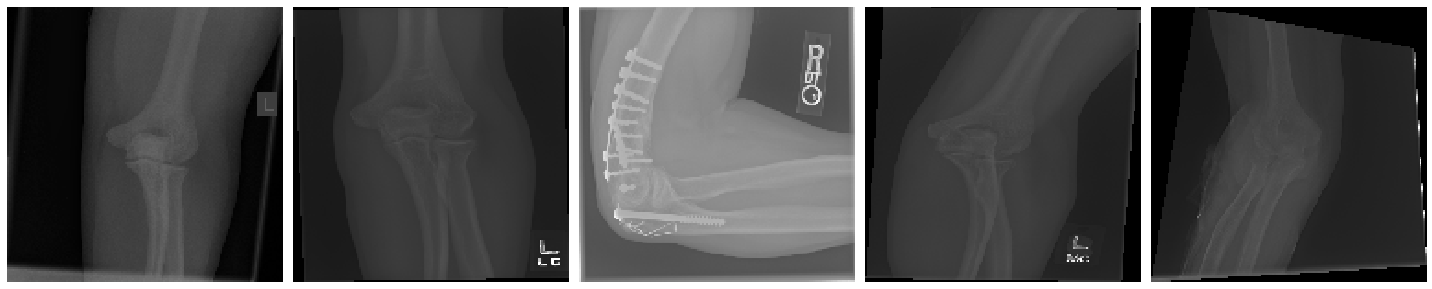

In [14]:
plotImages(sample_training_images[:5])

In [15]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [21]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
38/38 [==============================] - 108s 3s/step - loss: 0.6531 - accuracy: 0.5928 - val_loss: 0.6712 - val_accuracy: 0.5391
Epoch 2/15
38/38 [==============================] - 91s 2s/step - loss: 0.6380 - accuracy: 0.6015 - val_loss: 0.6617 - val_accuracy: 0.5521
Epoch 3/15
38/38 [==============================] - 90s 2s/step - loss: 0.6194 - accuracy: 0.6096 - val_loss: 0.6623 - val_accuracy: 0.5495
Epoch 4/15
38/38 [==============================] - 157s 4s/step - loss: 0.5877 - accuracy: 0.6301 - val_loss: 0.7300 - val_accuracy: 0.5312
Epoch 5/15
38/38 [==============================] - 265s 7s/step - loss: 0.5434 - accuracy: 0.6869 - val_loss: 0.7162 - val_accuracy: 0.5833
Epoch 6/15
38/38 [==============================] - 122s 3s/step - loss: 0.4681 - accuracy: 0.7562 - val_loss: 0.7906 - val_accuracy: 0.5521
Epoch 7/15
38/38 [==============================] - 103s 3s/step - loss: 0.4001 - accuracy: 0.8069 - val_loss: 0.9062 - val_accuracy: 0.5781
Epoch 8/15
38/3

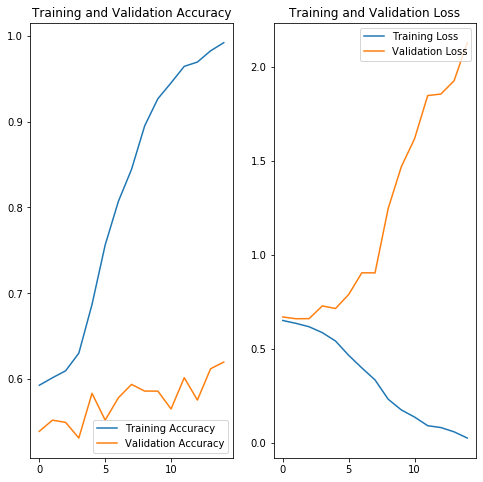

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()